In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

### Read the data

In [3]:
data = pd.read_csv('TradeInventories.csv',index_col='Date',parse_dates=True)
data.head(10)

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
1997-06-01,1334688
1997-07-01,1342310
1997-08-01,1348243
1997-09-01,1355839


In [4]:
data.index.freq='MS'

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 264 entries, 1997-01-01 to 2018-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Inventories  264 non-null    int64
dtypes: int64(1)
memory usage: 4.1 KB


### Visualise the data

In [6]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

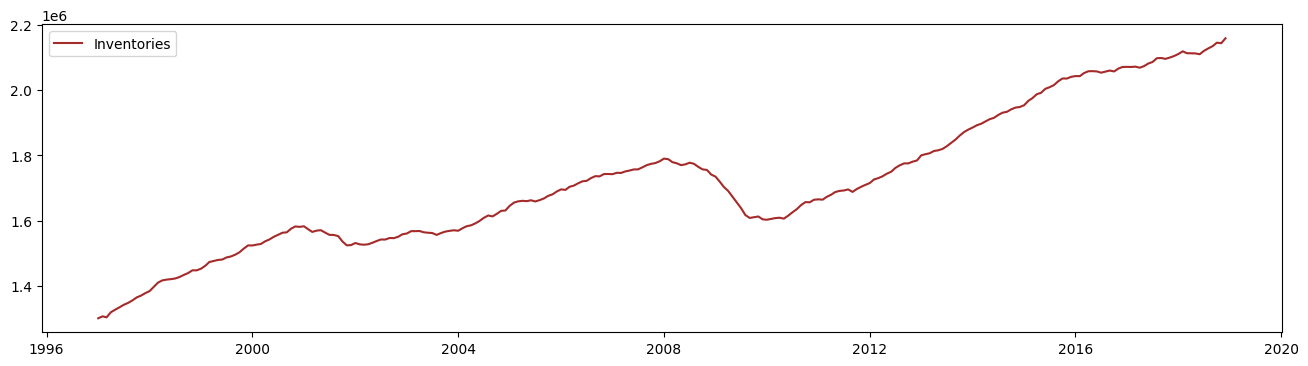

In [7]:
plt.figure(figsize=(16,4))
plt.plot(data, label='Inventories',color='brown')
plt.legend()
plt.show()

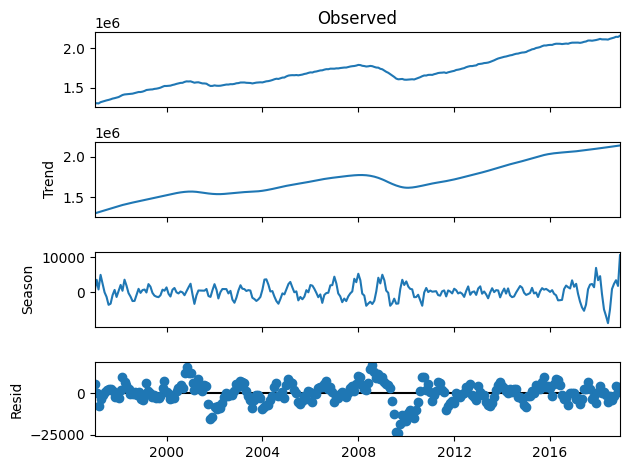

In [8]:
res = STL(data).fit()
res.plot()
plt.show()

### Augmented Dickey Fuller Test for Stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller

In [10]:
def adf_test(data):
    ## H0: Data is not Stationary
    ## H1: Data is Stationary
    if adfuller(data)[1] > 0.05:
        print("Failed to reject the null hypothesis")
        print('Data is Not stationary')
    else:
        print("Reject the null hypothesis")
        print("Data is stationary")

In [11]:
adf_test(data)

Failed to reject the null hypothesis
Data is Not stationary


### Differencing the data

In [12]:
from statsmodels.tsa.statespace.tools import diff

In [13]:
df_1 = diff(data,k_diff=1)

In [14]:
### Check for stationarity
adf_test(df_1)

Reject the null hypothesis
Data is stationary


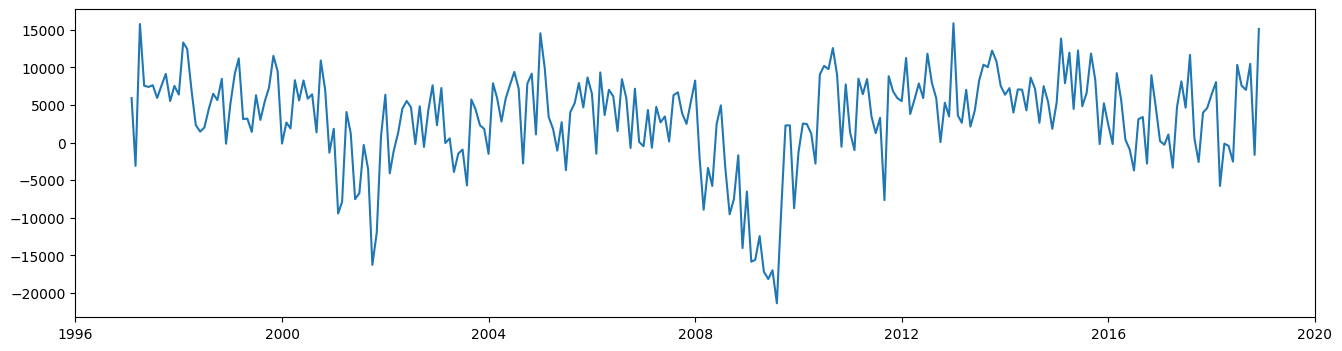

In [15]:
plt.figure(figsize=(16,4))

plt.plot(df_1)
plt.show()

### Find the order of AR , I and MA

### a. Use ACF and PACF plots

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

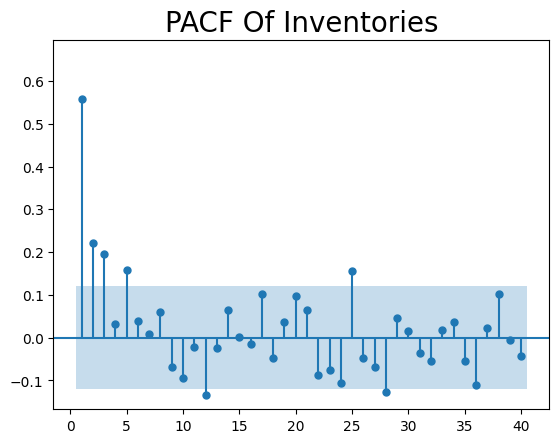

In [17]:
plot_pacf(df_1, lags=40, zero=False, auto_ylims=True)
plt.title("PACF Of Inventories",size=20)
plt.show()

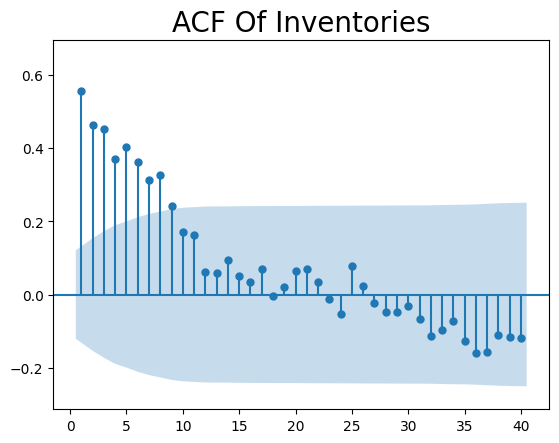

In [18]:
plot_acf(df_1, lags=40, zero=False, auto_ylims=True)
plt.title("ACF Of Inventories",size=20)
plt.show()

### b. Use pmdarima

In [19]:
#!pip install pmdarima

In [20]:
from pmdarima import auto_arima

In [21]:
#auto_model = auto_arima(data['Inventories'],  trace=True, seasonal=False)

In [22]:
auto_model = auto_arima(df_1,  trace=True, seasonal=False)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=5228.127, Time=0.13 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5409.215, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=5264.999, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=5327.280, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=5231.745, Time=0.03 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=5232.025, Time=0.05 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=5230.088, Time=0.10 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=5230.061, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=5231.279, Time=0.01 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=5232.506, Time=0.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=5233.204, Time=0.03 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=5232.081, Time=0.06 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=5225.667, Time=0.05 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=5229.374, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept

In [23]:
auto_model.predict(10)

2019-01-01    9671.357959
2019-02-01    5696.760974
2019-03-01    8482.394725
2019-04-01    5436.034278
2019-05-01    7538.897552
2019-06-01    5203.042991
2019-07-01    6789.420877
2019-08-01    4997.593787
2019-09-01    6193.466696
2019-10-01    4818.342271
Freq: MS, dtype: float64

In [24]:
#### Split data into train and test
#### auto_model.fit(train_data)
### auto_model.predict(test_length)

In [24]:
data

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294
...,...
2018-08-01,2127170
2018-09-01,2134172
2018-10-01,2144639


In [25]:
train_len = int(len(data)*0.8)

In [26]:
train_data = data[:211]

In [27]:
test_data = data[211:]

In [28]:
test_len = len(test_data)

In [29]:
train_len, test_len

(211, 53)

In [30]:
from statsmodels.tsa.arima.model import ARIMA

In [31]:
model = ARIMA(train_data['Inventories'], order=(5,2,8)).fit()

In [32]:
test_predicted = model.forecast(53)
test_predicted

2014-08-01    1.931912e+06
2014-09-01    1.940493e+06
2014-10-01    1.949088e+06
2014-11-01    1.957665e+06
2014-12-01    1.966219e+06
2015-01-01    1.974753e+06
2015-02-01    1.983268e+06
2015-03-01    1.991768e+06
2015-04-01    2.000262e+06
2015-05-01    2.008752e+06
2015-06-01    2.017241e+06
2015-07-01    2.025735e+06
2015-08-01    2.034232e+06
2015-09-01    2.042731e+06
2015-10-01    2.051235e+06
2015-11-01    2.059741e+06
2015-12-01    2.068248e+06
2016-01-01    2.076756e+06
2016-02-01    2.085264e+06
2016-03-01    2.093772e+06
2016-04-01    2.102279e+06
2016-05-01    2.110785e+06
2016-06-01    2.119291e+06
2016-07-01    2.127796e+06
2016-08-01    2.136302e+06
2016-09-01    2.144807e+06
2016-10-01    2.153311e+06
2016-11-01    2.161817e+06
2016-12-01    2.170322e+06
2017-01-01    2.178827e+06
2017-02-01    2.187332e+06
2017-03-01    2.195838e+06
2017-04-01    2.204343e+06
2017-05-01    2.212849e+06
2017-06-01    2.221354e+06
2017-07-01    2.229860e+06
2017-08-01    2.238365e+06
2

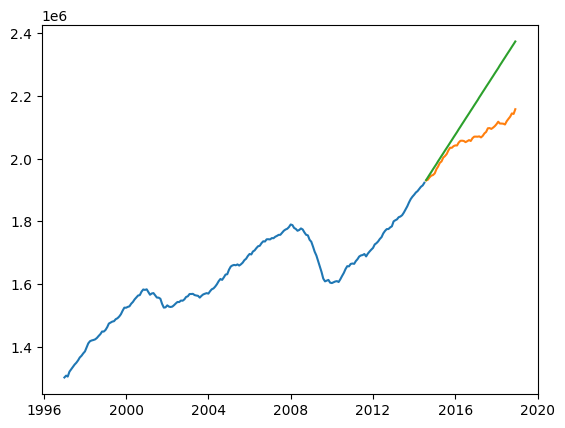

In [33]:
plt.plot(train_data['Inventories'])
plt.plot(test_data['Inventories'])
plt.plot(test_predicted)

In [34]:
model = ARIMA(data['Inventories'], order=(5,1,8)).fit()

In [35]:
forecast_values = model.forecast(53)

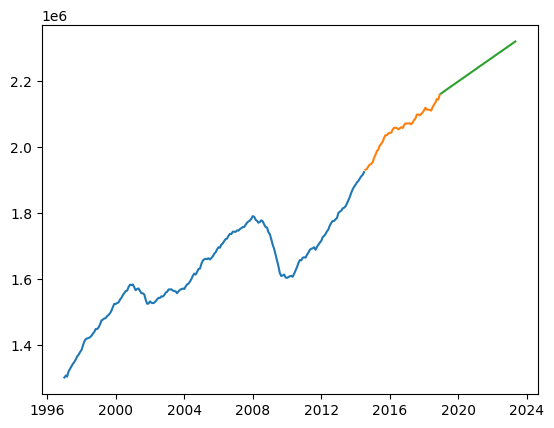

In [37]:
plt.plot(train_data['Inventories'])
plt.plot(test_data['Inventories'])
plt.plot(forecast_values)
plt.show()